In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('/content/GroceryDataset.csv')

In [3]:
df.head()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...


In [4]:
# Select the 'Feature' column for Apriori
# Each row's features will be split into a list of items
df['Feature'] = df['Feature'].astype(str).str.split('\n')

In [5]:
# Convert to list of transactions
transactions = df['Feature'].tolist()

In [6]:
# One-hot encoding (transaction -> dataframe of 0s and 1s)
from mlxtend.preprocessing import TransactionEncoder

In [7]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [16]:

# Apply Apriori
df_freq = apriori(df_encoded, min_support=0.05, use_colnames=True)

In [17]:

# Generate association rules
rules = association_rules(df_freq, metric="lift", min_threshold=1.0)

ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [18]:
df_freq = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(df_freq, metric="lift", min_threshold=1.0)

In [12]:
# Display results
print("\nFrequent Itemsets:")
print(df_freq)


Frequent Itemsets:
    support                                        itemsets
0  0.013090                           (100% Arabica Coffee)
1  0.010814                                        (Kosher)
2  0.014229                       (Ships Uncooked & Frozen)
3  0.012521  (Warning: Not For Human or Animal Consumption)
4  0.010245                                           (nan)


In [13]:
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


<ipython-input-19-dbe557b9e83b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets', data=top_itemsets, palette='mako')


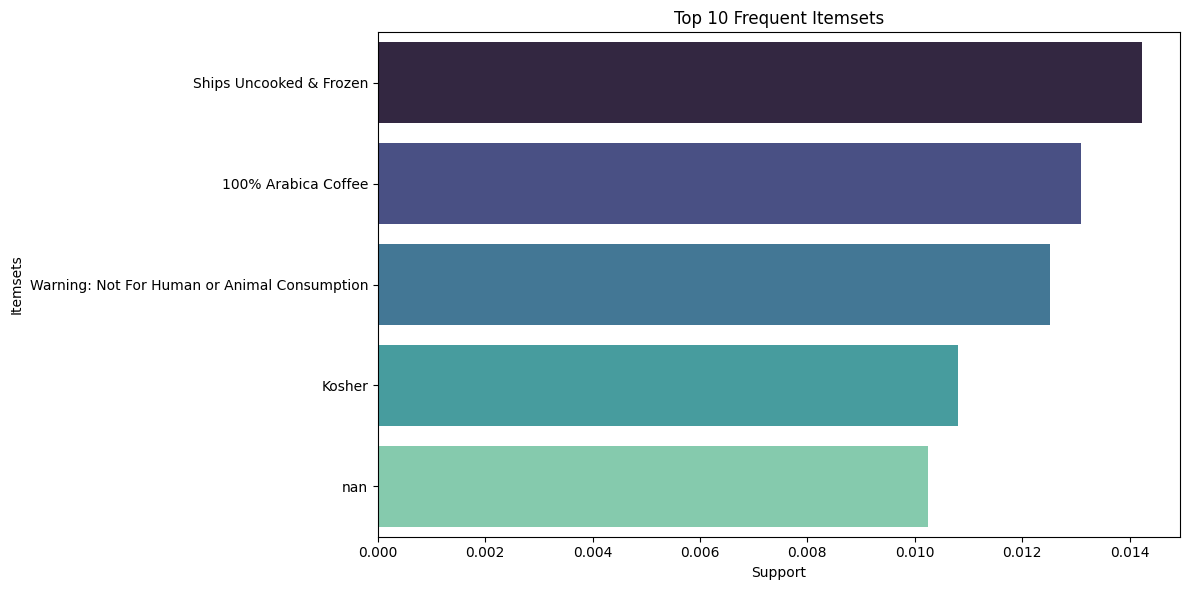

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by support and select top 10 itemsets
top_itemsets = df_freq.sort_values(by='support', ascending=False).head(10)

# Convert frozensets to strings for labeling
top_itemsets['itemsets'] = top_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(12, 6))
sns.barplot(x='support', y='itemsets', data=top_itemsets, palette='mako')
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.tight_layout()
plt.show()


In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='connfidence', size='lift', data=rules, alpha=0.6, hue='lift', palette='viridis', sizes=(20, 200))
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `connfidence` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

<ipython-input-21-ef5748d4f1df>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='support', y='confidence', size='lift', data=rules, alpha=0.6, hue='lift', palette='viridis', sizes=(20, 200))
<ipython-input-21-ef5748d4f1df>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Lift')


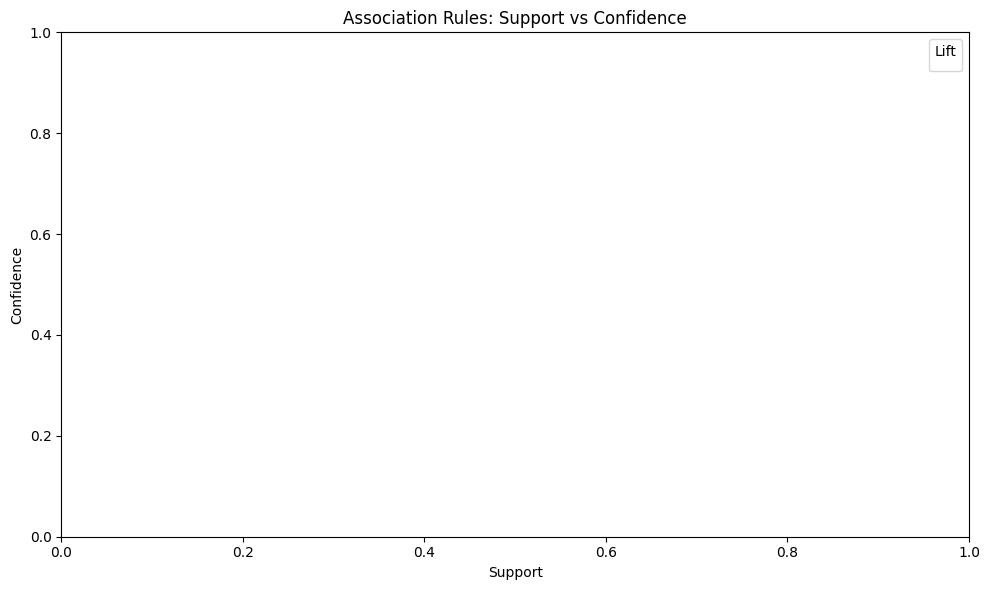

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, alpha=0.6, hue='lift', palette='viridis', sizes=(20, 200))
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.tight_layout()
plt.show()

In [22]:
# Create a pivot table
pivot = rules.pivot_table(index='anecedents', columns='consequents', values='lift', aggfunc='mean')

# Convert frozensets to strings for readability
pivot.index = pivot.index.map(lambda x: ', '.join(list(x)))
pivot.columns = pivot.columns.map(lambda x: ', '.join(list(x)))

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Heatmap of Lift Between Antecedents and Consequents')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


KeyError: 'anecedents'

In [23]:
# Create a pivot table
pivot = rules.pivot_table(index='antecedents', columns='consequents', values='lift', aggfunc='mean')

# Convert frozensets to strings for readability
pivot.index = pivot.index.map(lambda x: ', '.join(list(x)))
pivot.columns = pivot.columns.map(lambda x: ', '.join(list(x)))

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Heatmap of Lift Between Antecedents and Consequents')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>

In [25]:
# Create a pivot table
pivot = rules.pivot_table(index='antecedents', columns='consequents', values='lift', aggfunc='mean')

# Convert frozensets to strings for readability
pivot.index = pivot.index.map(lambda x: ', '.join(list(x)))
pivot.columns = pivot.columns.map(lambda x: ', '.join(list(x)))

# Only plot if pivot table is not empty
if not pivot.empty:
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title('Heatmap of Lift Between Antecedents and Consequents')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Insufficient strong rules so that to generate the heatmap for the lifting values")


Insufficient strong rules so that to generate the heatmap for the lifting values
